1. Розробити засоби для обліку продаж комп'ютерної техніки реших типів.
Тип комп'ютера характеризуються числовим ідентифікатором, маркою (компанія-виробник), в то кож ціною.
Додатково на комп'ютери може бути встановлена операційна система. Вона характеризується чи словим ідентифікатором, назно та ціною. Якщо система не встановлена, то формально комп'ютеру приписують операційну систему, для якої числовий Ідентифікатор рівний нулеві і піна с нульовою.
Товарний чек містить дату, ідентифікатор типу комп'ютера, ідентифікатор операційної системи та кількість проданих комп'ютерів цього типу.
Товарні чеки задано у кількох сву-файлах. Також в окремих файлах подано інформацію про типи комп'ютерів та пераційних систем.
2. Вивести:
(а) сумарну вартість проданої за весь час компватерної техніки:
(б) вартість комп'ютерної техніки, проданої кожного дня;
(в) діаграму сум відповідно до попереднього пункту;
(г) для конкретної операційної системи, яку вибирають з випадаючого списку, сумарну вартість проданої комп'ютерної техніки з цією системою.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import display
import ipywidgets as widgets
import numpy as np

In [2]:
computers = pd.read_csv('computer_type.csv')
computers

,IdComp,Mark,CostComp
0,11,Asus,25000
1,12,Lenovo,35000
2,13,Apple,57000
3,14,Samsung,40000


In [3]:
os = pd.read_csv('os.csv')
os.replace('Missing', np.nan, inplace=True)
os

,IdOs,NameOs,CostOs
0,0,NaN,0
1,1,Windows,1500
2,2,Mac,2000
3,3,Linux,1750


In [4]:
checks1 = pd.read_csv('checks1.csv')
checks2 = pd.read_csv('checks2.csv')
checks = pd.concat([checks1, checks2], ignore_index=True)
checks['Date'] = pd.to_datetime(checks['Date'])
checks

,Date,IdComp,IdOs,Quantity
0,2024-11-28,11,1,2
1,2024-11-29,13,2,3
2,2024-11-29,12,0,1
3,2024-11-30,14,3,4
4,2024-11-30,12,1,2


In [5]:
all_df = checks.merge(computers, on='IdComp')
all_df = all_df.merge(os, on='IdOs')
all_df

,Date,IdComp,IdOs,Quantity,Mark,CostComp,NameOs,CostOs
0,2024-11-28,11,1,2,Asus,25000,Windows,1500
1,2024-11-29,13,2,3,Apple,57000,Mac,2000
2,2024-11-29,12,0,1,Lenovo,35000,NaN,0
3,2024-11-30,14,3,4,Samsung,40000,Linux,1750
4,2024-11-30,12,1,2,Lenovo,35000,Windows,1500


### task a:

In [6]:
all_df['TotalCost'] = (all_df['CostComp'] + all_df['CostOs']) * all_df['Quantity']
total_income = all_df['TotalCost'].sum()
print(f'Total income: {total_income}')

Total income: 505000


### task b:

In [7]:
total_income_everyday = all_df.groupby('Date')['TotalCost'].sum().reset_index()
total_income_everyday

,Date,TotalCost
0,2024-11-28,53000
1,2024-11-29,212000
2,2024-11-30,240000


### task c:

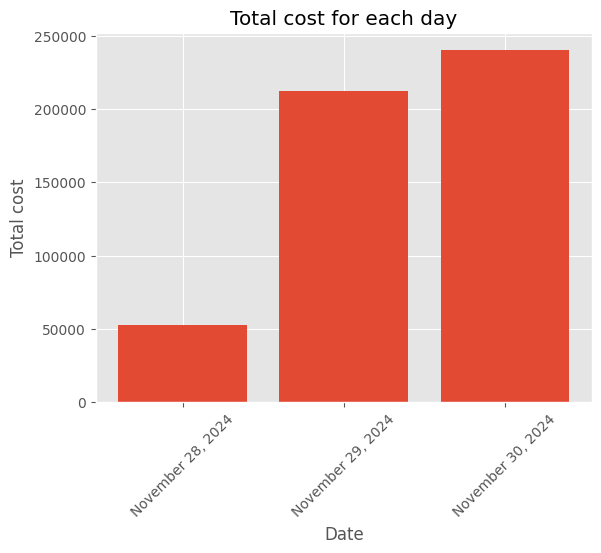

In [8]:
plt.style.use('ggplot')
format_dates = total_income_everyday['Date'].apply(lambda x: datetime.strftime(x, format='%B %d, %Y'))
plt.bar(format_dates, total_income_everyday['TotalCost'])
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Total cost')
plt.title('Total cost for each day')
plt.show()

### tack d:

In [9]:
total_cost_for_os_group = all_df.groupby('NameOs')['TotalCost'].sum()
total_cost_for_os = total_cost_for_os_group.reset_index()

def total_cost_os(name_os):
    cost_for_os = total_cost_for_os_group.loc[name_os]
    display(f"Total cost for {name_os}: {cost_for_os}")

In [10]:
choose_os = widgets.Dropdown(
    description = 'Choose name of os:',
    value = total_cost_for_os['NameOs'].loc[0],
    options = total_cost_for_os['NameOs'].unique()
)

widget= widgets.interactive(total_cost_os, name_os=choose_os)
display(widget)

interactive(children=(Dropdown(description='Choose name of os:', options=('Linux', 'Mac', 'Windows'), value='L…